In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input\brain\Testing\glioma_tumor\image(1).jpg
input\brain\Testing\glioma_tumor\image(10).jpg
input\brain\Testing\glioma_tumor\image(100).jpg
input\brain\Testing\glioma_tumor\image(11).jpg
input\brain\Testing\glioma_tumor\image(12).jpg
input\brain\Testing\glioma_tumor\image(13).jpg
input\brain\Testing\glioma_tumor\image(14).jpg
input\brain\Testing\glioma_tumor\image(15).jpg
input\brain\Testing\glioma_tumor\image(16).jpg
input\brain\Testing\glioma_tumor\image(17).jpg
input\brain\Testing\glioma_tumor\image(18).jpg
input\brain\Testing\glioma_tumor\image(19).jpg
input\brain\Testing\glioma_tumor\image(2).jpg
input\brain\Testing\glioma_tumor\image(20).jpg
input\brain\Testing\glioma_tumor\image(21).jpg
input\brain\Testing\glioma_tumor\image(22).jpg
input\brain\Testing\glioma_tumor\image(23).jpg
input\brain\Testing\glioma_tumor\image(24).jpg
input\brain\Testing\glioma_tumor\image(25).jpg
input\brain\Testing\glioma_tumor\image(26).jpg
input\brain\Testing\glioma_tumor\image(27).jpg
input\brain\Te

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [10]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [14]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [15]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [17]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [18]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
history = model.fit(X_train,y_train,epochs=5,validation_split=0.1)

Epoch 1/5
83/83 [==============================] - 288s 3s/step - loss: 2.1878 - accuracy: 0.2838 - val_loss: 1.3632 - val_accuracy: 0.2891
Epoch 2/5
83/83 [==============================] - 280s 3s/step - loss: 1.2966 - accuracy: 0.3704 - val_loss: 1.1639 - val_accuracy: 0.4660
Epoch 3/5
83/83 [==============================] - 310s 4s/step - loss: 1.0543 - accuracy: 0.5513 - val_loss: 1.0247 - val_accuracy: 0.5374
Epoch 4/5
83/83 [==============================] - 293s 4s/step - loss: 0.9274 - accuracy: 0.5997 - val_loss: 0.9123 - val_accuracy: 0.5782
Epoch 5/5
83/83 [==============================] - 276s 3s/step - loss: 0.8278 - accuracy: 0.6561 - val_loss: 0.8176 - val_accuracy: 0.6293


In [22]:
model.save('brain_mri_detection.h5')

c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

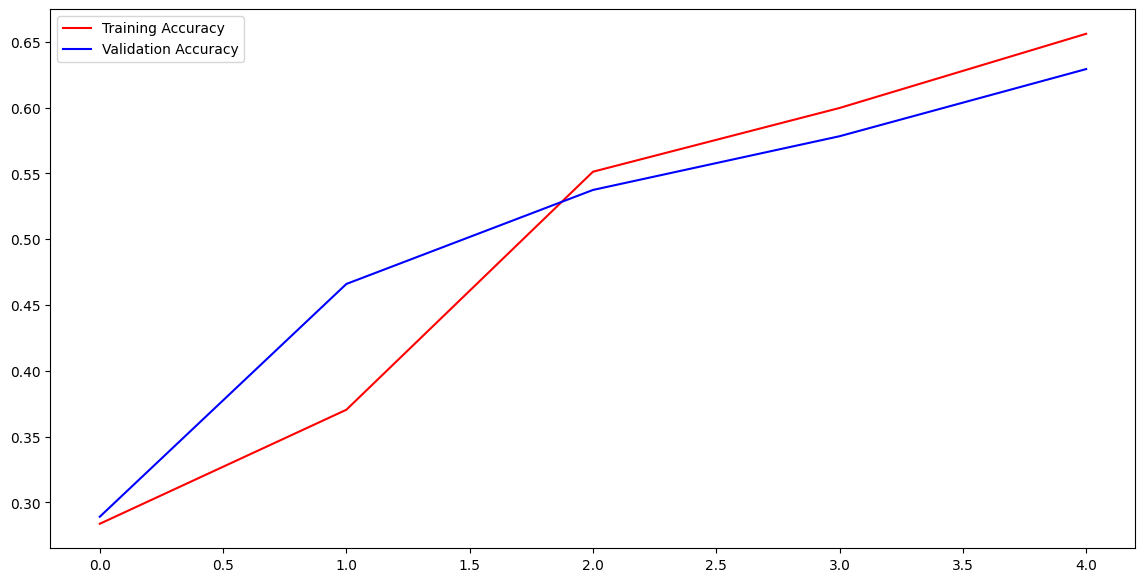

In [24]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

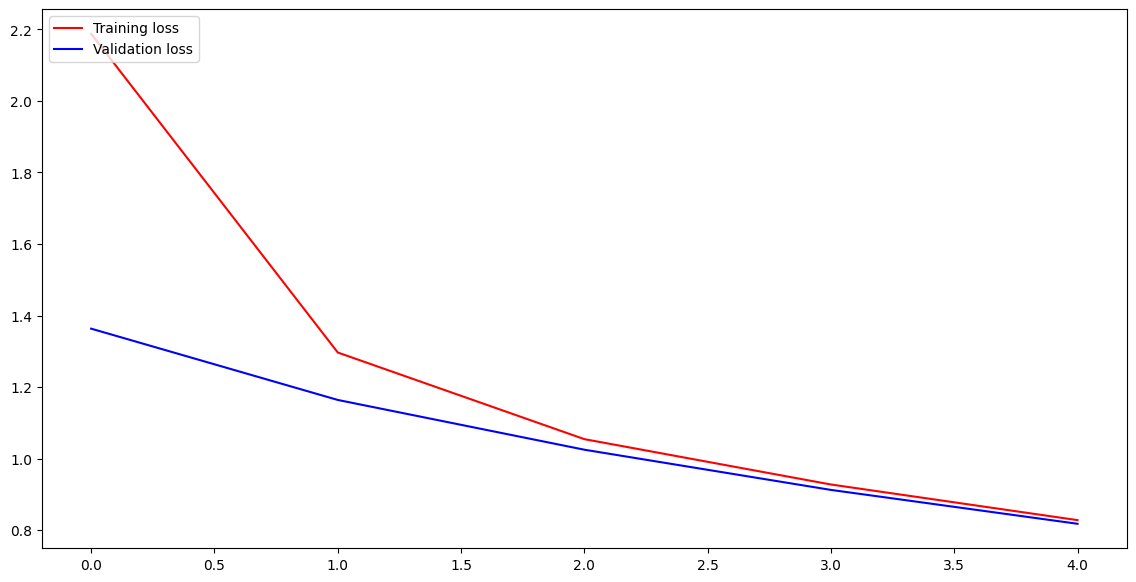

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()


In [29]:
img = cv2.imread('gliotum.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [30]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

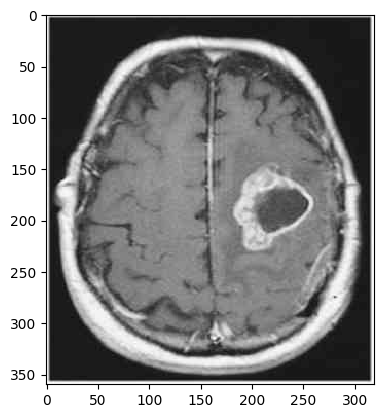

In [32]:
from tensorflow.keras.preprocessing import image
img = image.load_img('gliotum.jpg')# enter path of img to be detected
plt.imshow(img,interpolation='nearest')
plt.show()

In [33]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 263ms/step


1

In [35]:
import os

def predict_image(model, img_path):
    # Check if image path exists
    if not os.path.exists(img_path):
        print(f"Image not found at path: {img_path}")
        return None, None

    # Load and preprocess the image
    img = cv2.imread(img_path)
    if img is None:
        print("Error loading image. Make sure the path is correct and the image exists.")
        return None, None
    
    img = cv2.resize(img, (150, 150))
    img_array = np.expand_dims(img, axis=0) / 255.0
    # Make a prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    # Map predicted class index to label
    labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
    return labels[predicted_class[0]], prediction

# Example usage:
img_path = 'gliotum.jpg'
predicted_label, prediction = predict_image(model, img_path)

if predicted_label:
    print(f"Predicted label: {predicted_label}")
    print(f"Prediction confidence scores: {prediction}")

1/1 [==============================] - 0s 156ms/step
Predicted label: glioma_tumor
Prediction confidence scores: [[0.58820647 0.17595293 0.05696177 0.17887884]]


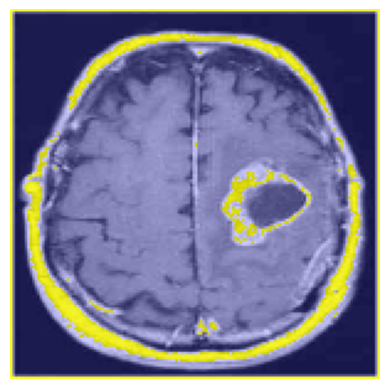

In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

def get_grad_cam_heatmap(model, img_array, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        predicted_class = tf.argmax(predictions[0])
        class_output = predictions[:, predicted_class]

    # Get the gradients of the class output with respect to the feature map
    grads = tape.gradient(class_output, conv_outputs)
    # Pool the gradients over all the axes
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel by its corresponding gradient
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., np.newaxis]
    heatmap = tf.reduce_mean(heatmap, axis=-1)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    return heatmap

def display_grad_cam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap * alpha + img
    plt.imshow(superimposed_img.astype('uint8'))
    plt.axis('off')
    plt.show()

# Example usage:
img_array = cv2.imread(img_path)
img_array = cv2.resize(img_array, (150, 150))
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Get Grad-CAM heatmap
heatmap = get_grad_cam_heatmap(model, img_array, 'conv2d_8')
# Display Grad-CAM
display_grad_cam(img_path, heatmap)

1/1 [==============================] - 0s 104ms/step
Predicted label: glioma_tumor
Prediction confidence scores: [[0.58820647 0.17595293 0.05696177 0.17887884]]


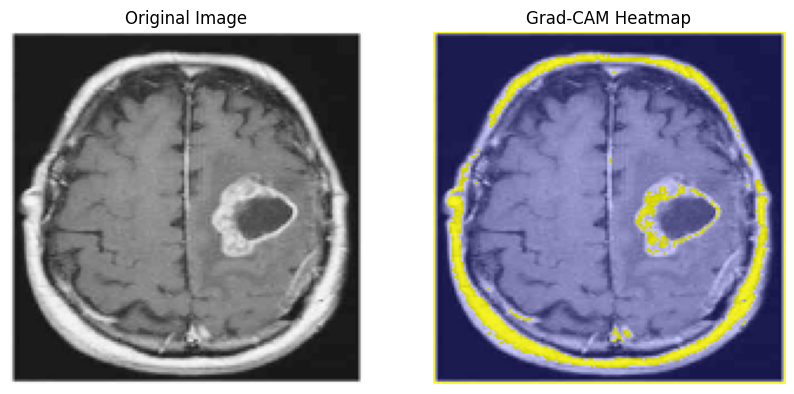

In [40]:
import os

def predict_image(model, img_path):
    # Check if image path exists
    if not os.path.exists(img_path):
        print(f"Image not found at path: {img_path}")
        return None, None

    # Load and preprocess the image
    img = cv2.imread(img_path)
    if img is None:
        print("Error loading image. Make sure the path is correct and the image exists.")
        return None, None
    
    img = cv2.resize(img, (150, 150))
    img_array = np.expand_dims(img, axis=0) / 255.0
    # Make a prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    # Map predicted class index to label
    labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
    return labels[predicted_class[0]], prediction

# Example usage:
img_path = 'gliotum.jpg'
predicted_label, prediction = predict_image(model, img_path)

if predicted_label:
    print(f"Predicted label: {predicted_label}")
    print(f"Prediction confidence scores: {prediction}")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

def get_grad_cam_heatmap(model, img_array, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        predicted_class = tf.argmax(predictions[0])
        class_output = predictions[:, predicted_class]

    # Get the gradients of the class output with respect to the feature map
    grads = tape.gradient(class_output, conv_outputs)
    # Pool the gradients over all the axes
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel by its corresponding gradient
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., np.newaxis]
    heatmap = tf.reduce_mean(heatmap, axis=-1)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    return heatmap

def display_grad_cam(img_path, heatmap, alpha=0.4):
    # Load the original image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (150, 150))
    
    # Resize heatmap to the same size as the image
    heatmap_resized = cv2.resize(heatmap, (img_resized.shape[1], img_resized.shape[0]))
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_resized = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

    # Superimpose the heatmap on the image
    superimposed_img = heatmap_resized * alpha + img_resized

    # Plot original image and heatmap side by side
    plt.figure(figsize=(10, 5))

    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(img_resized)
    plt.title("Original Image")
    plt.axis('off')
# Display the image with Grad-CAM heatmap
    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img.astype('uint8'))
    plt.title("Grad-CAM Heatmap")
    plt.axis('off')

    plt.show()

# Example usage:
img_path='gliotum.jpg' #img path
img_array = cv2.imread(img_path)
img_array = cv2.resize(img_array, (150, 150))
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Get Grad-CAM heatmap
heatmap = get_grad_cam_heatmap(model, img_array, 'conv2d_8')

# Display Grad-CAM along with the original image
display_grad_cam(img_path, heatmap)

In [42]:
# Assuming you have trained the model
model.save('vgg_brain_tumor.h5')  # This will save your trained model
